In [37]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### 1. Answer with the type of test you would use (assume normal distribution):


#### Is there a difference in grades of students on the second floor compared to grades of all students?

In [ ]:
# 1 sample: students on the second floor compared to ALL students
# Looking for the difference, not if the means are greater or less
# than so we have a two_tailed test

# stats.ttest_1samp(a, popmean)

# a being the array of numerical values of your sample
# popmean being the mean of the total population 

In [8]:
stats.ttest_1samp?

#### Are adults who drink milk taller than adults who dont drink milk?

In [ ]:
# 2 samples: adults who drink milk vs adults who do not drink milk
# We are looking to see if the mean height of adults who drink 
# milk is greater than the mean height of adults who do not
# This is a one-tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True) 

# a_smaller being the array that holds the heights of adults
# who do not drink milk
# a_larger being the array that holds the heights of adults 
# who do drink milk

#### Is the the price of gas higher in texas or in new mexico?

In [ ]:
# 2 samples: gas prices in TX vs gas prices in NM
# We are looking to see if the gas prices are greater in one state 
# over the other
# This is a one_tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True)

# a_smaller being the array which holds TX gas prices
# a_larger being the array which holds NM gas prices


In [4]:
stats.ttest_ind?

#### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# 3 samples: ANOVA test type

# stats.f_oneway(data_science_array, web_dev_array, cloud_array)

In [6]:
stats.f_oneway?

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
# 2 samples independent of each other: 
# office_1 with 40 samples, a mean of 90 days and a std of 15
# office_2 with 50 samples, a mean of 100 days and a std of 20

# We are looking if the two means are different so this is 
# a one_tailed test

# Remember, for a two-tailed test: p < α IOT reject Ho 

In [45]:
μ1 = 90
σ1 = 15
sample_size1 = 40

office_1_dis = np.random.normal(μ1, σ1, size=sample_size1,).astype(int)

In [47]:
μ2 = 100
σ2 = 20
sample_size2 = 50

office_2_dis = np.random.normal(μ2, σ2, size=sample_size2).astype(int)

In [46]:
office_1_dis

array([106,  67,  86,  77,  59,  73,  82,  77,  93,  77, 109,  73,  94,
        93, 100,  88, 123,  74, 105,  82,  89,  69,  71,  92,  89,  93,
        79,  96,  82, 108,  88, 132,  92,  74,  94, 111,  95, 102,  73,
        74])

In [ ]:
# STEP 1: Plot the Samples in Histograms

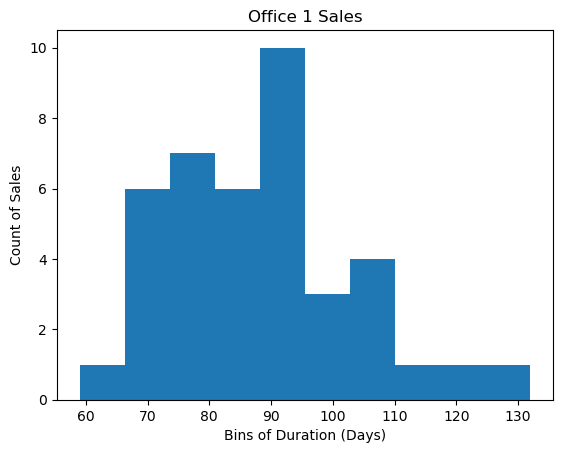

In [48]:
plt.hist(office_1_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 1 Sales')
plt.show()

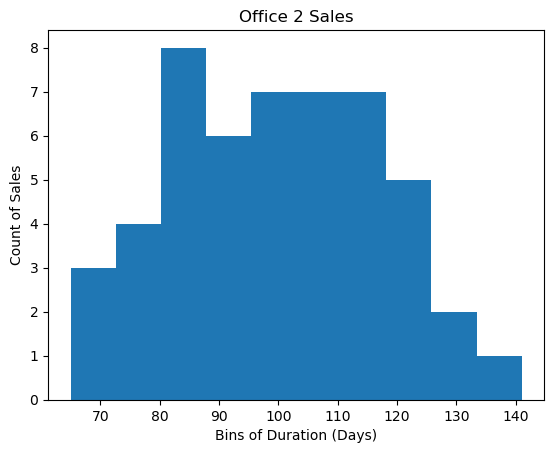

In [49]:
plt.hist(office_2_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 2 Sales')
plt.show()

In [26]:
# STEP 2: Set Hypotheses

# Ho: The average time it takes to sell a home is not different
# between office 1 and office 2.

# Ha: The average time it takes to sell a home is different between
# office 1 and office 2.

In [25]:
# STEP 3: Set the alpha

α = 0.05

In [ ]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [27]:
sub_α = 0.05

# sub_Ho: sales between offices 1 and 2 have equal variance.
# sub_Ha: sales between offices 1 and 2 have inequal variance.

In [51]:
stat, sub_p = stats.levene(office_1_dis, office_2_dis)

In [52]:
sub_p < α

# the levene p is less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

False

In [53]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(office_1_dis, 
                                office_2_dis,
                                equal_var=True)

In [58]:
t_stat

-3.0042329958224396

In [59]:
p_val

0.003467202003532812

In [ ]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

In [63]:
p_val < α

True

In [ ]:
# Because the p_value is greater than or equal to alpha, we must
# reject the Null Hypothesis

# Ha: The average time it takes to sell a home IS different between
# office 1 and office 2.

## ORRRRR

Text(0.5, 1.0, 'Sales in Offices 1 and 2')

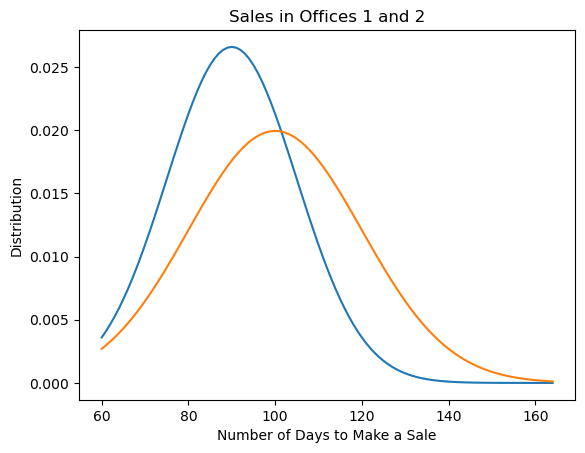

In [102]:
x = np.arange(60, 165)
y = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel('Number of Days to Make a Sale')
plt.ylabel('Distribution')
plt.title('Sales in Offices 1 and 2')

In [ ]:
# Set Hypotheses

# Ho: There is NOT a difference in the sales time between office 1 and 2

# Ha: There is a difference in the sales time between office 1 and 2

In [ ]:
# we have a two-tailed, two sample test

In [ ]:
μ1 = 90
σ1 = 15
sample_size1 = 40

μ2 = 100
σ2 = 20
sample_size2 = 50

In [109]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1 = μ1,
                           std1 = σ1,
                           nobs1 = 40,
                           mean2 = μ2,
                           std2 = σ2,
                           nobs2 = 50)

In [108]:
α = 0.05

In [110]:
p_val < α

True

In [ ]:
# If the p value is less than alpha, we can reject the null
# hypothesis

In [114]:
if p_val < α:
    print('We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.')
else:
    print('We cannot reject the Null Hypothesis.')

We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.


### 3. Load the mpg dataset and use it to answer the following questions:

In [64]:
mpg = data('mpg')

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [65]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
# Two samples for testing: 1999 cars and 2008 cars
# We want to know if there's a difference so we have a two-tailed
# test --> p < α

# stats.ttest_ind(1999_mpg, 2008_mpg)



In [ ]:
# STEP 1: Create histograms of the two samples' distributions

In [115]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [116]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524


In [117]:
old_cars = mpg[mpg.year == 1999].fe

In [118]:
newer_cars = mpg[mpg.year == 2008].fe

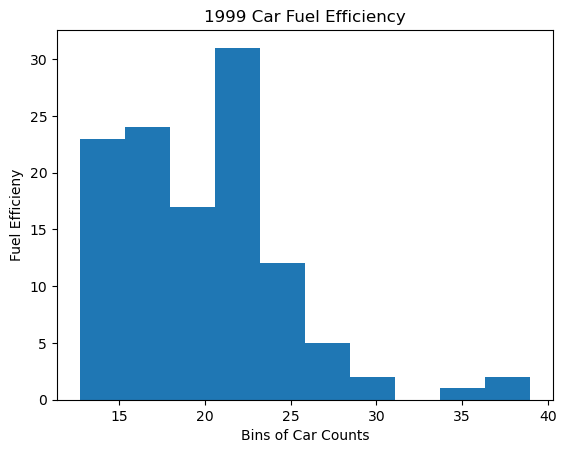

In [120]:
plt.hist(old_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficieny')
plt.title('1999 Car Fuel Efficiency')
plt.show()

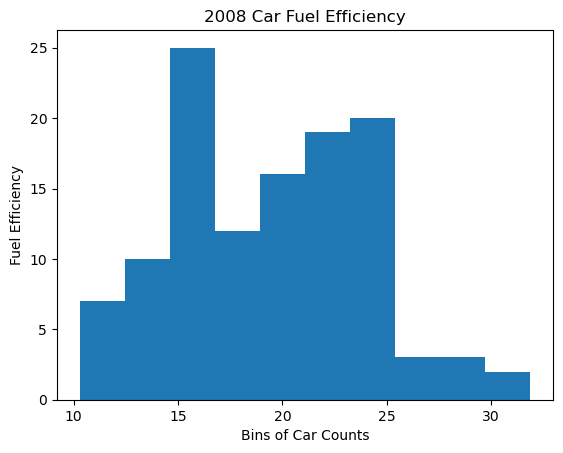

In [121]:
plt.hist(newer_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficiency')
plt.title('2008 Car Fuel Efficiency')
plt.show()

In [ ]:
# STEP 2: Set Hypotheses

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

# Ha: There is a difference in the fuel-efficiency in cars
# from 2008 vs 1999

In [73]:
# STEP 3: Set the alpha

α = 0.05

In [ ]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [122]:
sub_α = 0.05

# sub_Ho: average mileage between 1999 and 2008 cars have
# equal variance.
# sub_Ha: average mileage between 1999 and 2008 cars have
# inequal variance.

In [123]:
stat, sub_p = stats.levene(old_cars, newer_cars)

In [124]:
sub_p < α

# the levene p is not less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

False

In [125]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(old_cars, 
                                newer_cars,
                                equal_var=True)

In [127]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

p_val < α

False

In [ ]:
# Because the p_value is NOT less than alpha, we cannot reject the
# null hypothesis

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

#### Are compact cars more fuel-efficient than the average car?

In [ ]:
# Lets form our hypothesis:

# Ho: Compact cars are less or equally fuel efficient than the 
# average car (fe <= avg_fe)

# Ha: Compact cars are more fuel_efficient than the average car 
# (fe > avg_fe)

In [128]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524


In [129]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [132]:
μ_overall = mpg['fe'].mean()

In [133]:
compact_cars = mpg[mpg['class'] == 'compact'].fe

In [134]:
α = 0.05

In [135]:
t_stat, p_val = stats.ttest_1samp(compact_cars, μ_overall)

In [138]:
if ((p_val / 2) and (t_stat > 0)):
    print('We can reject the Null Hypothesis!')
    print('There is evidence that the alternative hypothesis is true')
else:
    print('We fail to reject the Null Hypothesis')

We can reject the Null Hypothesis!
There is evidence that the alternative hypothesis is true


In [ ]:
# Ha: Compact cars are more fuel_efficient than the average car

#### Do manual cars get better gas mileage than automatic cars?

In [ ]:
# H0:  Manual cars have worse or equal gas mielage to automatic

# Ha: Manual cars have better gas mielage than automatic

In [ ]:
# two samples: auto and manual
# greater than/less than: one_sided
# stats.ttest_ind

In [139]:
manual_fe = mpg[mpg.trans.str.startswith('man')].fe
auto_fe = mpg[mpg.trans.str.startswith('auto')].fe

In [140]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [ ]:
# fail to reject Ho: presume that variance is equal

In [155]:
t_stat, p_val = stats.ttest_ind(auto_fe, manual_fe)

In [157]:
p_val

5.510464610044009e-06

In [ ]:
# p_val is less than our alpha

In [156]:
t_stat

-4.652577547151351

In [ ]:
# t_stat > 0:

In [ ]:
# we met both conditions so we can reject Ho and say that there
# is a difference

# Ha: Manual cars receive better gas mileage than automatic vehicles